# Examples

Here are some examples of how to run some of the functions in `project2_util.py`. They use a custom object called `ImageROI` which grabs a rotated rectangle from the image. The functions of relevance are `alpha_blend`, `crop_function`, `ellipse_mask_from_roi`, and `warp_helper_function`. Tthere are also a few visualization functions displayed down below such as `draw_roi_on_image`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from project2_util import *


## Alpha Blending

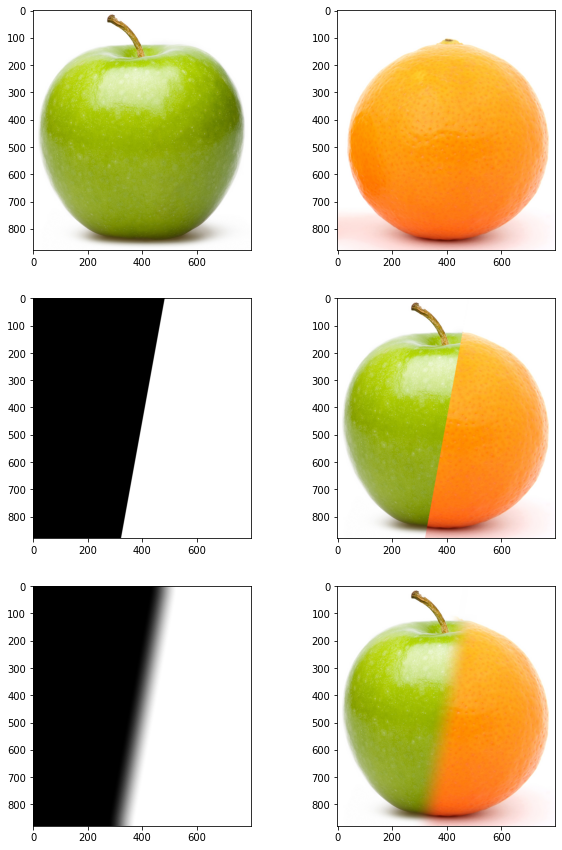

In [ ]:
from project2_util import alpha_blend

apple_fname = "/work/example-images/apple.jpg"
orange_fname = "/work/example-images/orange.jpg"
mask_fname = "/work/example-images/split_mask.png"
image1 = cv2.cvtColor(cv2.imread(apple_fname), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread(orange_fname), cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_fname, cv2.IMREAD_GRAYSCALE)
mask2 = cv2.GaussianBlur(mask.copy(), (91, 91), 30.0)

blend = alpha_blend(image1, image2, mask)
blend2 = alpha_blend(image1, image2, mask2)

fig, ax = plt.subplots(3,2,figsize=(2*5,3*5))
ax[0,0].imshow(image1)
ax[0,1].imshow(image2)
ax[1,0].imshow(mask, cmap='gray') # Grayscale colormap
ax[1,1].imshow(blend)
ax[2,0].imshow(mask2, cmap='gray') # Grayscale colormap
ax[2,1].imshow(blend2)


## Region of Interest Cropping

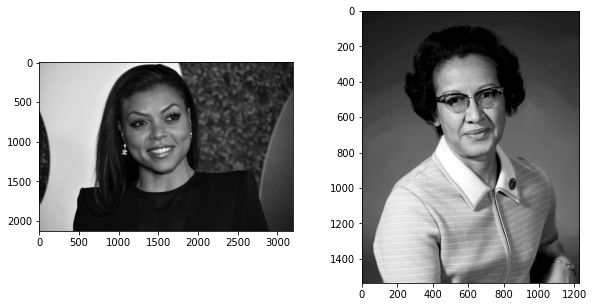

In [ ]:
# Credit - Image sources
# Image of Kathrine Johnson johnson.jpg from 
# https://kids.nationalgeographic.com/history/article/katherine-johnson
# Copyright Smith Collection / Gado / Getty Images

# Image of Taraji P. Henson (depicted Kathrine Johnson in film "Hidden Figures")
# henson.jpg
# converted to grayscale from 
# https://time.com/4373381/taraji-p-henson-lucy-award-speech/ 
# Copyright Mike Windle—GQ Magazine/Getty Images

# Load and display images
henson_fname = "/work/example-images/henson.jpg"
johnson_fname = "/work/example-images/johnson.jpg"
henson_image = cv2.imread(henson_fname, cv2.IMREAD_GRAYSCALE)
johnson_image = cv2.imread(johnson_fname, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(henson_image, cmap='gray')
ax[1].imshow(johnson_image, cmap='gray')



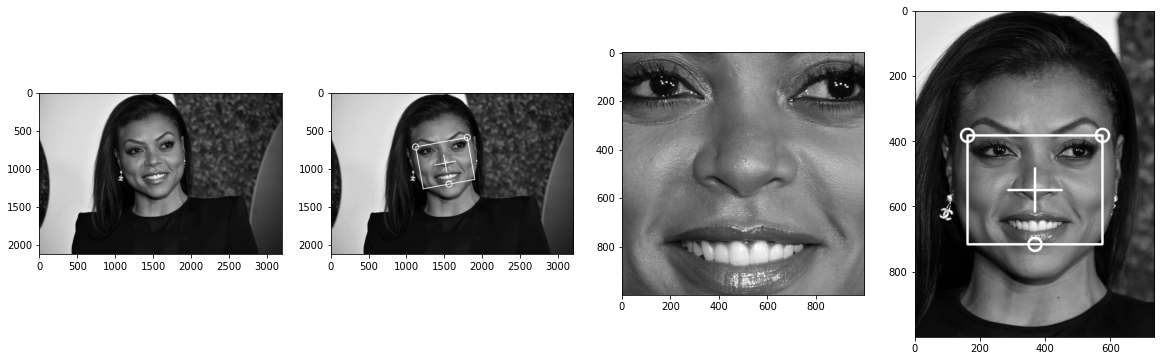

In [ ]:
# Getting Region of Interest in Henson's image
henson_roi = ImageROI(**{
    "center": [ 1504.2710723876953, 935.6799812316895 ],
    "angle": -0.18037110567092896,
    "width": 691.2134399414062,
    "height": 560.4520774193403
})
# Crop region of interest directly
henson_image_crop_small, _ = crop_function(henson_image, henson_roi, 1000)
# Crop expanded version of region of interest, shifted slightly
henson_image_crop, henson_crop_roi = crop_function(henson_image, henson_roi, 1000, wh_scales=(2.2, 3.0), scroll_xy=(0, 50))

fig, ax = plt.subplots(1, 4, figsize=(5*4, 6))
ax[0].imshow(henson_image, cmap='gray')
ax[1].imshow(draw_roi_on_image(henson_image, henson_roi), cmap='gray')
ax[2].imshow(henson_image_crop_small, cmap='gray')
ax[3].imshow(draw_roi_on_image(henson_image_crop, henson_crop_roi, thickness=5), cmap='gray')


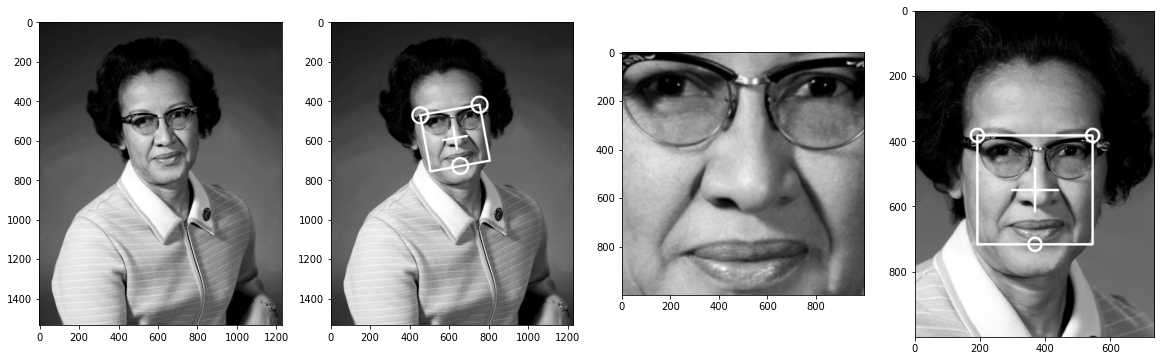

In [ ]:
# Getting Region of Interest in Johnson's Image
johnson_roi = ImageROI(**{
  "center": [
    627.5249862670898,
    590.8055009841919
  ],
  "angle": -0.17809294164180756,
  "width": 304.8212585449219,
  "height": 288.16887433109616
})
# Crop region of interest directly
johnson_image_crop_small, _ = crop_function(johnson_image, johnson_roi, 1000)
johnson_image_crop, johnson_crop_roi = warp_helper_function(johnson_image, henson_image_crop, johnson_roi, henson_crop_roi)

fig, ax = plt.subplots(1, 4, figsize=(5*4, 6))
ax[0].imshow(johnson_image, cmap='gray')
ax[1].imshow(draw_roi_on_image(johnson_image, johnson_roi), cmap='gray')
ax[2].imshow(johnson_image_crop_small, cmap='gray')
ax[3].imshow(draw_roi_on_image(johnson_image_crop, johnson_crop_roi, thickness=5), cmap='gray')

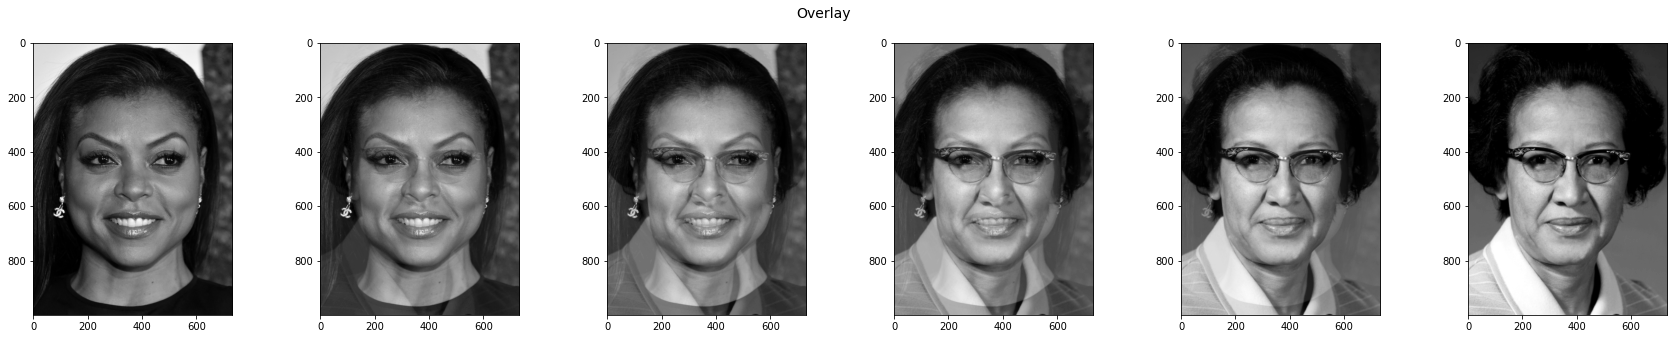

In [ ]:
overlay_display(henson_image_crop, johnson_image_crop)

## Selecting Region of Interest

Select points of interest by selecting top left, top right, and center bottom points.

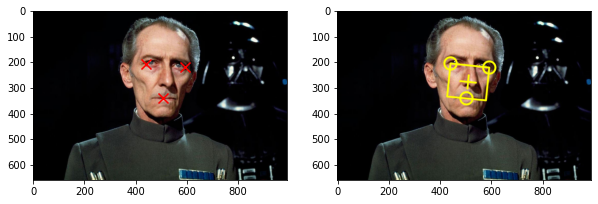

In [ ]:
# Credit - Image sources
# Peter Cushing in Star Wars
# cushing.jpg from
# https://www.standard.co.uk/culture/film/star-wars-actor-peter-cushing-recognised-with-blue-plaque-in-london-a3831346.html
# Copyright Lucasfilm Ltd.
cushing_fname = "/work/example-images/cushing.jpg"
cushing_image = cv2.cvtColor(cv2.imread(cushing_fname), cv2.COLOR_BGR2RGB)

# Select points
x0, y0 = 442.0000043993529, 205.000000140422 # Top left
x1, y1 = 593.000010020724, 220.00000129203522 # Top right
x2, y2 = 504.7663578412311, 340.68539929292666 # Center Bottom

cushing_roi = roi_from_points((x0, y0), (x1, y1), (x2, y2))

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(cushing_image)
ax[0].scatter([x0, x1, x2], [y0, y1, y2], s=100, color='r', marker='x')
ax[1].imshow(draw_roi_on_image(cushing_image, cushing_roi, thickness=6))


## Region Of Interest Cropping with Ellipses

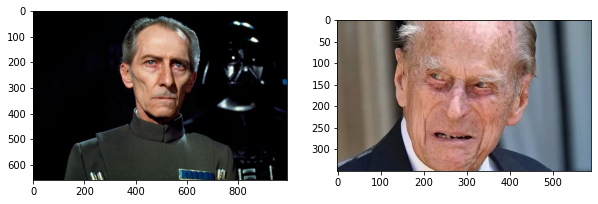

In [ ]:
# Credit - Image sources
# Peter Cushing in Star Wars
# cushing.jpg from
# https://www.standard.co.uk/culture/film/star-wars-actor-peter-cushing-recognised-with-blue-plaque-in-london-a3831346.html
# Copyright Lucasfilm Ltd.

# Prince Phillip from Express News Article
# prince.jpg from
# https://www.express.co.uk/news/royal/1399421/Prince-Philip-news-hospital-staff-Duke-bluntness-fuss-royal-family-latest-VN
# Copyright Getty Images

# Load and display images
cushing_fname = "/work/example-images/cushing.jpg" # Reload to make this section independent
prince_fname = "/work/example-images/prince.jpg"
cushing_image = cv2.cvtColor(cv2.imread(cushing_fname), cv2.COLOR_BGR2RGB)
prince_image = cv2.cvtColor(cv2.imread(prince_fname), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cushing_image)
ax[1].imshow(prince_image)


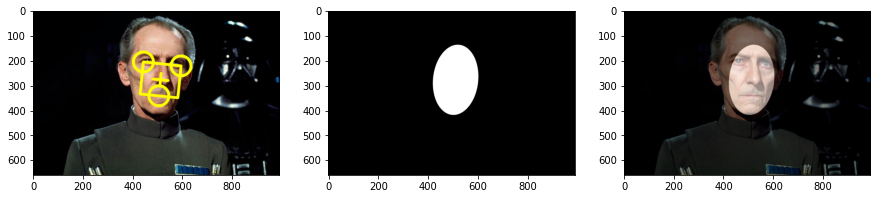

In [ ]:
# Build from points again
x0, y0 = 442.0000043993529, 205.000000140422 # Top left
x1, y1 = 593.000010020724, 220.00000129203522 # Top right
x2, y2 = 504.7663578412311, 340.68539929292666 # Center Bottom
cushing_roi = roi_from_points((x0, y0), (x1, y1), (x2, y2))

ellipse_mask = ellipse_mask_from_roi(cushing_image, cushing_roi, wh_scales=(1.4, 2.2))
display = draw_image_with_mask(cushing_image, ellipse_mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(draw_roi_on_image(cushing_image, cushing_roi))
ax[1].imshow(ellipse_mask, cmap='gray')
ax[2].imshow(display)

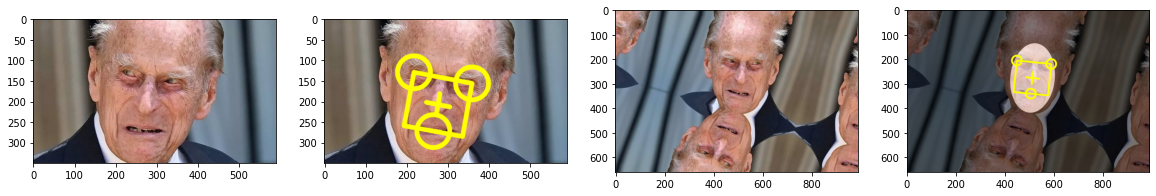

In [ ]:
# Getting Region of Interest in Prince Phillip's Image
prince_roi = ImageROI(**{
  "center": [
    277.1278305053711,
    207.84030675888062
  ],
  "angle": 0.18109266459941864,
  "width": 144.36065673828125,
  "height": 131.83647126793005
})
# Warp region of interest to right spot for ellipse -- Note the need to flip
prince_image_crop, prince_crop_roi = warp_helper_function(prince_image, cushing_image, prince_roi, cushing_roi, flip=True)

fig, ax = plt.subplots(1, 4, figsize=(5*4, 6))
ax[0].imshow(prince_image)
ax[1].imshow(draw_roi_on_image(prince_image, prince_roi))
ax[2].imshow(prince_image_crop)
ax[3].imshow(draw_roi_on_image(draw_image_with_mask(prince_image_crop, ellipse_mask), prince_crop_roi, thickness=5))


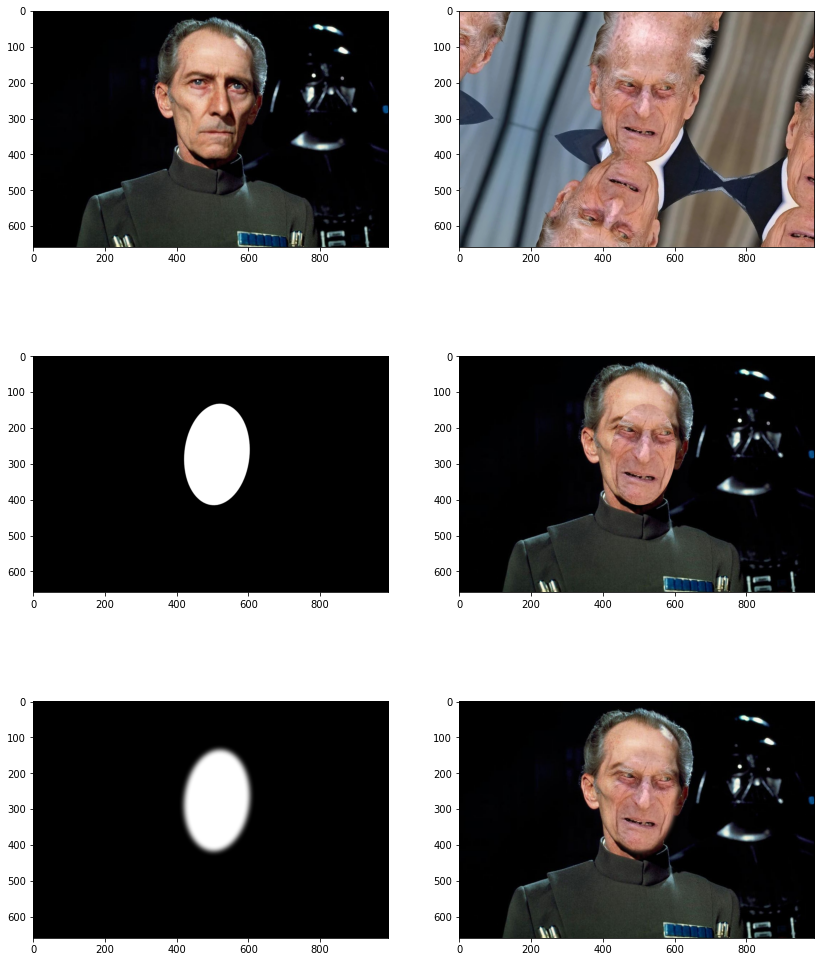

In [ ]:
ellipse_mask2 = cv2.GaussianBlur(ellipse_mask.copy(), (31, 31), 7.0)
blend = alpha_blend(cushing_image, prince_image_crop, ellipse_mask)
blend2 = alpha_blend(cushing_image, prince_image_crop, ellipse_mask2)

fig, ax = plt.subplots(3,2,figsize=(2*7,3*6))
ax[0,0].imshow(cushing_image)
ax[0,1].imshow(prince_image_crop)
ax[1,0].imshow(ellipse_mask, cmap='gray') # Grayscale colormap
ax[1,1].imshow(blend)
ax[2,0].imshow(ellipse_mask2, cmap='gray') # Grayscale colormap
ax[2,1].imshow(blend2)

Note that the alpha blending (even blurred) doesn't work as well as Laplacian blending, as Laplacian blending better combines the small details, such as shading, as seen below

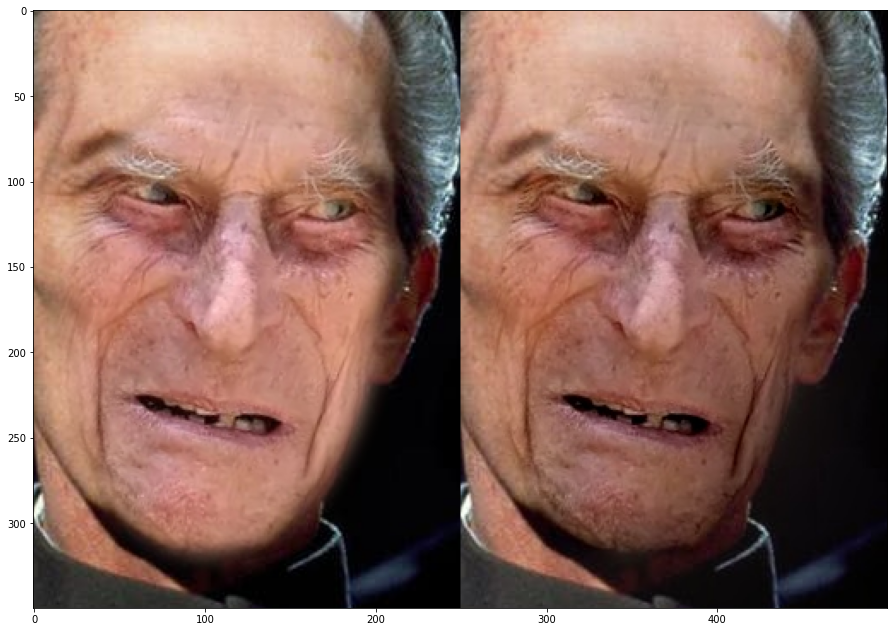

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,11))
lblend = cv2.cvtColor(cv2.imread("/work/description-images/cushing_prince_laplacian.jpg"), cv2.COLOR_BGR2RGB)
blend_display = blend2[100:450, 400:650]
lblend_display = lblend[100:450, 400:650]
ax.imshow(np.concatenate((blend_display, lblend_display), 1))

## Face Swap

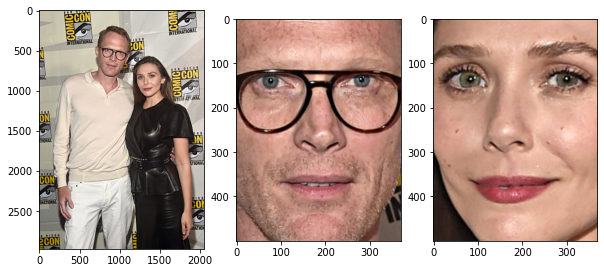

In [ ]:
# wandavision.jpg taken from
# https://www.popsugar.com/celebrity/photo-gallery/46402649/image/46402720/Pictured-Paul-Bettany-Elizabeth-Olsen-San-Diego-Comic-Con
# Image Source: Getty / Alberto E. Rodriguez

# Load and display images
wandavision_fname = "/work/example-images/wandavision.jpg"
wandavision_image = cv2.cvtColor(cv2.imread(wandavision_fname), cv2.COLOR_BGR2RGB)

# Crops
paul_roi = ImageROI(**{
  "center": [
    918.4117660522461,
    600.6470594406128
  ],
  "angle": 0.21866893768310547,
  "width": 221.26907348632812,
  "height": 171.37506229738142
})
paul_crop, _ = crop_function(wandavision_image, paul_roi, 500, wh_scales=(1.7, 2.3))
elizabeth_roi = ImageROI(**{
  "center": [
    1341.400001525879,
    902.1999998092651
  ],
  "angle": -0.12435499578714371,
  "width": 193.4941864013672,
  "height": 135.44593017141568
})
elizabeth_crop, _ = crop_function(wandavision_image, elizabeth_roi, 500, wh_scales=(1.7, 2.3))


fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(wandavision_image)
ax[1].imshow(paul_crop)
ax[2].imshow(elizabeth_crop)


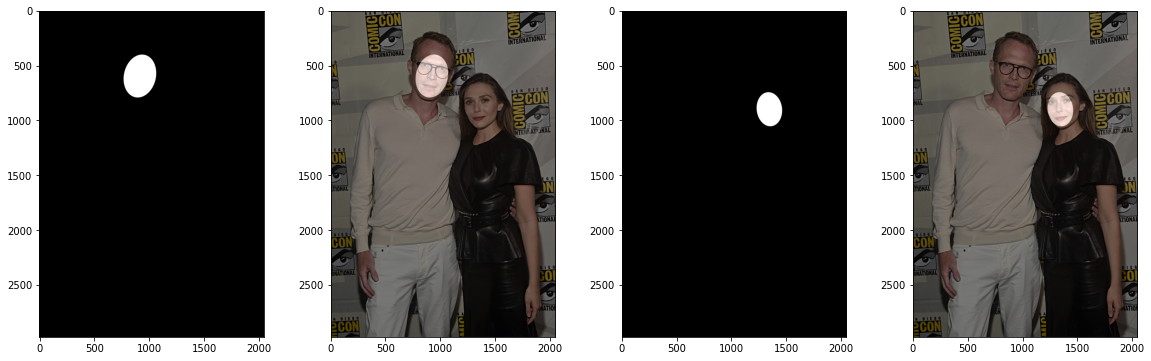

In [ ]:
# Get masks
paul_ellipse_mask = ellipse_mask_from_roi(wandavision_image, paul_roi, wh_scales=(1.7, 2.3))
paul_display = draw_image_with_mask(wandavision_image, paul_ellipse_mask)
elizabeth_ellipse_mask = ellipse_mask_from_roi(wandavision_image, elizabeth_roi, wh_scales=(1.7, 2.3))
elizabeth_display = draw_image_with_mask(wandavision_image, elizabeth_ellipse_mask)

fig, ax = plt.subplots(1, 4, figsize=(20, 6))
ax[0].imshow(paul_ellipse_mask, cmap='gray')
ax[1].imshow(paul_display)
ax[2].imshow(elizabeth_ellipse_mask, cmap='gray')
ax[3].imshow(elizabeth_display)

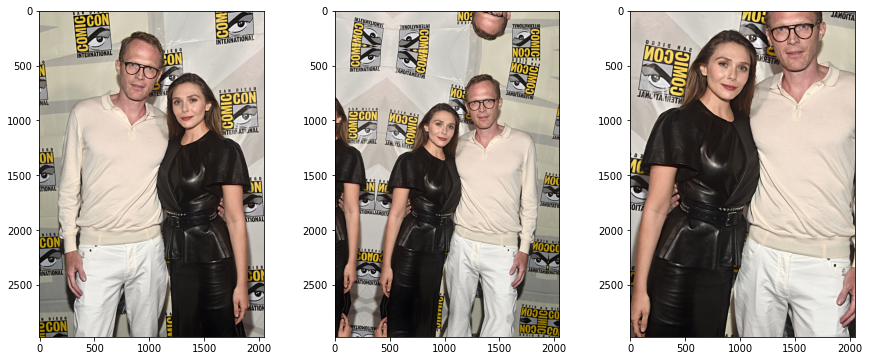

In [ ]:
# Get swapped locations
paul_image_crop, paul_crop_roi = warp_helper_function(wandavision_image, wandavision_image, paul_roi, elizabeth_roi, flip=True)
elizabeth_image_crop, elizabeth_crop_roi = warp_helper_function(wandavision_image, wandavision_image, elizabeth_roi, paul_roi, flip=True)

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(wandavision_image)
ax[1].imshow(paul_image_crop)
ax[2].imshow(elizabeth_image_crop)


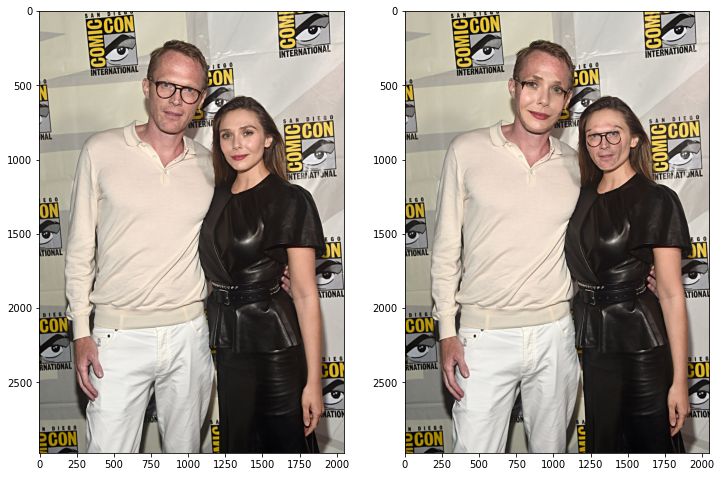

In [ ]:
# Swap the faces!
blend = alpha_blend(wandavision_image, elizabeth_image_crop, paul_ellipse_mask)
blend = alpha_blend(blend, paul_image_crop, elizabeth_ellipse_mask)
fig, ax = plt.subplots(1, 2, figsize=(12, 9))
ax[0].imshow(wandavision_image)
ax[1].imshow(blend)


## Laplacian Visualization

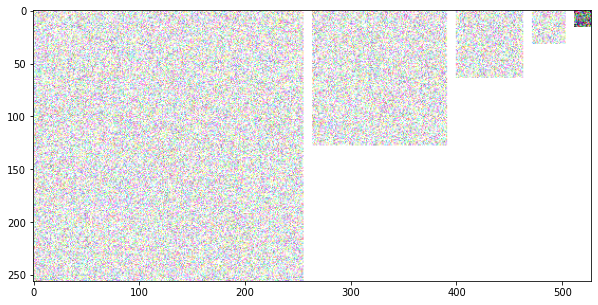

In [ ]:
# Pass in Laplacian pyramid as list and you will visualize it
lp_fake = [ 255*np.random.rand(2**(8-i), 2**(8-i), 3).astype(np.float32) for i in range(5) ]
lp_fake_viz = visualize_pyramid(lp_fake, padding=8)
plt.figure(figsize=(10, 10))
plt.imshow(lp_fake_viz)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0bf9a5ad-e55f-48e2-82a9-70f553b074de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>